ON sales dataset


Comparison of GD, Momentum, and NAG:
  Method  Iters  Time(s)  Final Loss
MOMENTUM    182 0.002271    0.048704
     NAG    185 0.002576    0.048704
      GD   1093 0.012110    0.048704


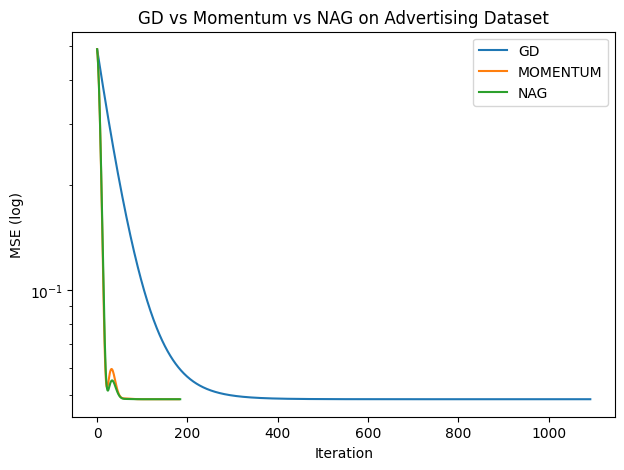

Fastest by iterations: MOMENTUM
Fastest by wall time: MOMENTUM


In [5]:
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("advertising.csv").dropna()
X = df[["TV","Radio","Newspaper"]].values.astype(float)
y = df["Sales"].values.astype(float).reshape(-1,1)

# Standardize features
mu, sigma = X.mean(axis=0), X.std(axis=0)+1e-12
X = (X - mu) / sigma
X = np.c_[np.ones((X.shape[0],1)), X]

# Standardize target for smoother optimization
y = (y - y.mean()) / (y.std() + 1e-12)

# Functions
def mse(X,y,w):
    r = X @ w - y
    return (r.T @ r / (2*len(y)))[0,0]

def grad(X,y,w):
    return (X.T @ (X @ w - y)) / len(y)

def run_opt(X,y,lr=0.01,gamma=0.9,max_iter=5000,tol=1e-8,patience=50,mode="gd"):
    w = np.zeros((X.shape[1],1))
    v = np.zeros_like(w)
    losses = []
    t0 = time.time()
    best = float("inf")
    noimp = 0
    for it in range(max_iter):
        if mode=="gd":
            g = grad(X,y,w); v = lr*g; w = w - v
        elif mode=="momentum":
            g = grad(X,y,w); v = gamma*v + lr*g; w = w - v
        elif mode=="nag":
            g = grad(X,y,w - gamma*v); v = gamma*v + lr*g; w = w - v
        L = mse(X,y,w); losses.append(L)
        if best - L > tol:
            best = L; noimp = 0
        else:
            noimp += 1
        if noimp >= patience: break
    return {"losses":np.array(losses),"iters":len(losses),"time":time.time()-t0}

# Run all three
results = {}
for mode in ["gd","momentum","nag"]:
    results[mode.upper()] = run_opt(X,y,mode=mode)

# Tabular results
rows = []
for k,v in results.items():
    rows.append([k,v["iters"],v["time"],v["losses"][-1]])
tbl = pd.DataFrame(rows,columns=["Method","Iters","Time(s)","Final Loss"])
print("Comparison of GD, Momentum, and NAG:")
print(tbl.sort_values(by=["Iters","Time(s)"]).to_string(index=False))

# Plot loss curves (avoid log(0))
plt.figure(figsize=(7,5))
for k in results:
    plt.plot(np.maximum(results[k]["losses"],1e-12),label=k)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("MSE (log)")
plt.title("GD vs Momentum vs NAG on Advertising Dataset")
plt.legend()
plt.show()

best_it = tbl.sort_values(by="Iters").iloc[0]["Method"]
best_time = tbl.sort_values(by="Time(s)").iloc[0]["Method"]
print("Fastest by iterations:",best_it)
print("Fastest by wall time:",best_time)


on Housing dataset


Comparison of GD, Momentum, and NAG:
  Method  Iters  Time(s)  Final Loss
     NAG    185 0.003270    0.159099
MOMENTUM    205 0.003263    0.159099
      GD   1426 0.020716    0.159099


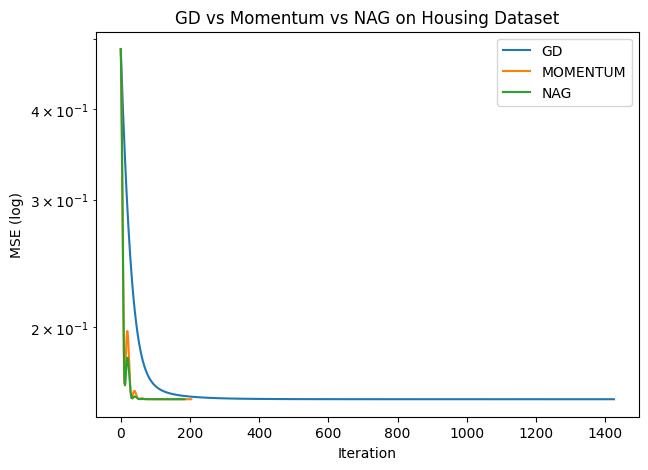

Fastest by iterations: NAG
Fastest by wall time: MOMENTUM


In [3]:
import pandas as pd, numpy as np, time, matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Housing.csv")

# Target
y = df["price"].values.astype(float).reshape(-1,1)
y = (y - y.mean()) / (y.std() + 1e-12)   # scale target

# Features
X = df.drop(columns=["price"])
X = pd.get_dummies(X, drop_first=True)    # One-hot encode categoricals

# Standardize features
mu, sigma = X.mean(axis=0), X.std(axis=0)+1e-12
X = (X - mu) / sigma
X = np.c_[np.ones((X.shape[0],1)), X.values]  # add bias column

# Functions
def mse(X,y,w):
    r = X @ w - y
    return (r.T @ r / (2 * len(y)))[0,0]

def grad(X,y,w):
    return (X.T @ (X @ w - y)) / len(y)

def run_opt(X,y,lr=0.01,gamma=0.9,max_iter=5000,tol=1e-8,patience=50,mode="gd"):
    w = np.zeros((X.shape[1],1))
    v = np.zeros_like(w)
    losses = []
    t0 = time.time()
    best = float("inf")
    noimp = 0
    for it in range(max_iter):
        if mode=="gd":
            g = grad(X,y,w); v = lr*g; w = w - v
        elif mode=="momentum":
            g = grad(X,y,w); v = gamma*v + lr*g; w = w - v
        elif mode=="nag":
            g = grad(X,y,w - gamma*v); v = gamma*v + lr*g; w = w - v
        L = mse(X,y,w); losses.append(L)
        if best - L > tol:
            best = L; noimp = 0
        else:
            noimp += 1
        if noimp >= patience: break
    return {"losses":np.array(losses),"iters":len(losses),"time":time.time()-t0}

# Run all three
results = {}
for mode in ["gd","momentum","nag"]:
    results[mode.upper()] = run_opt(X,y,mode=mode)

# Tabular results
rows = []
for k,v in results.items():
    rows.append([k,v["iters"],v["time"],v["losses"][-1]])
tbl = pd.DataFrame(rows,columns=["Method","Iters","Time(s)","Final Loss"])
print("Comparison of GD, Momentum, and NAG:")
print(tbl.sort_values(by=["Iters","Time(s)"]).to_string(index=False))

# Plot loss curves
plt.figure(figsize=(7,5))
for k in results:
    plt.plot(np.maximum(results[k]["losses"],1e-12),label=k)  # avoid log(0)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("MSE (log)")
plt.title("GD vs Momentum vs NAG on Housing Dataset")
plt.legend()
plt.show()

# Print fastest methods
best_it = tbl.sort_values(by="Iters").iloc[0]["Method"]
best_time = tbl.sort_values(by="Time(s)").iloc[0]["Method"]
print("Fastest by iterations:",best_it)
print("Fastest by wall time:",best_time)
